In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
import seaborn as sns

In [3]:
df = pd.read_csv('C:/Users/LGuser/OneDrive/바탕 화면/통계분석/soccer/soccer.csv')

In [4]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [5]:
# 결측치 확인
df.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [6]:
# 결측치 확인- 있는지 없는지 확인
df.isnull().values.any()

False

In [7]:
df.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [8]:
# object 타입인 날짜 형식을 date 타입으로 바꾸기
df.date = pd.to_datetime(df.date)

In [9]:
df.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

In [10]:
# 날짜순으로 내림차순. # 데이터에 적용하려면 inplace = True 추가
df.sort_values(by='date', ascending = False)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
41539,2019-11-19,Lebanon,North Korea,0,0,FIFA World Cup qualification,Beirut,Lebanon,False
41517,2019-11-19,U.S. Virgin Islands,Saint Martin,1,2,CONCACAF Nations League,Upper Bethlehem,U.S. Virgin Islands,False
41515,2019-11-19,Saint Lucia,Montserrat,0,1,CONCACAF Nations League,Gros Islet,Saint Lucia,False
41514,2019-11-19,El Salvador,Dominican Republic,2,0,CONCACAF Nations League,San Salvador,El Salvador,False
41513,2019-11-19,Mexico,Bermuda,2,1,CONCACAF Nations League,Mexico City,Mexico,False
...,...,...,...,...,...,...,...,...,...
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False


In [11]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [12]:
# home_score + away_score 더해서 score_sum 열 생성
df['score_sum'] = df.home_score + df.away_score

In [13]:
# home_score - away_score 빼서 score_diff 열 생성
df['score_diff'] = df.home_score - df.away_score

In [14]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,score_sum,score_diff
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,6,2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,3,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,4,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,3


<Axes: >

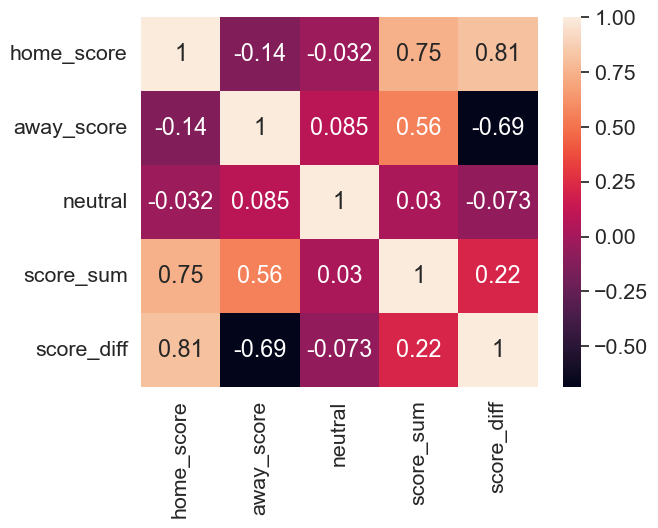

In [15]:
# numeric_only=True : 수치형 데이터만 사용하겠다는 의미
# annot= True : 수치를 표시하겠다.
# df_corr = df.corr(numeric_only=True)
# sns.heatmap(df_corr,annot=True)
sns.set(font_scale= 1.4)
sns.heatmap(df.corr(numeric_only=True), annot= True)

In [17]:
df.corr(numeric_only=True)

,home_score,away_score,neutral,score_sum,score_diff
home_score,1.000000,-0.135921,-0.032086,0.746540,0.813031
away_score,-0.135921,1.000000,0.084924,0.557696,-0.687325
neutral,-0.032086,0.084924,1.000000,0.030151,-0.073432
score_sum,0.746540,0.557696,0.030151,1.000000,0.219585
score_diff,0.813031,-0.687325,-0.073432,0.219585,1.000000


In [18]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'score_sum', 'score_diff'],
      dtype='object')

In [19]:
df.index

RangeIndex(start=0, stop=41540, step=1)

In [20]:
#std : 표준편차(클수록 표준편차 크다-데이터가 들쑥날쑥. 낮을수록 -데이터가 균일)
# mean : 평균
# describe() : 각종 통계량을 요약해서 출력.
df[['home_score']].describe()

,home_score
count,41540.000000
mean,1.745643
std,1.753444
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,31.000000


In [21]:
df[['away_score']].describe()

,away_score
count,41540.000000
mean,1.187819
std,1.405511
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,21.000000


In [22]:
df.describe()

,date,home_score,away_score,score_sum,score_diff
count,41540,41540.000000,41540.000000,41540.000000,41540.000000
mean,1990-12-10 18:34:50.322580608,1.745643,1.187819,2.933462,0.557824
min,1872-11-30 00:00:00,0.000000,0.000000,0.000000,-21.000000
25%,1978-02-03 12:00:00,1.000000,0.000000,1.000000,-1.000000
50%,1997-09-05 12:00:00,1.000000,1.000000,3.000000,0.000000
75%,2009-03-31 00:00:00,2.000000,2.000000,4.000000,2.000000
max,2019-11-19 00:00:00,31.000000,21.000000,31.000000,31.000000
std,NaN,1.753444,1.405511,2.092864,2.391647


In [23]:
# 함수 생성
def formal_score(df):
    max_s = max(df.home_score, df.away_score)
    min_s = min(df.home_score, df.away_score)
    return '{}-{}'.format(max_s, min_s)

In [24]:
# axis = 1 : 열 기준
df['formal_score'] = df.apply(formal_score, axis = 1)

In [25]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,score_sum,score_diff,formal_score
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,0,0-0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,6,2,4-2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,3,1,2-1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,4,0,2-2
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,3,3-0


## 경기결과 분석 및 그래프 그리기

In [26]:
# 원정팀 방문경기에서 홈팀이 획득한 총점수
df.groupby('away_team')['home_score'].count()

away_team
Abkhazia          10
Afghanistan       71
Albania          157
Alderney          12
Algeria          213
                ... 
Yugoslavia       290
Zambia           418
Zanzibar         147
Zimbabwe         266
Åland Islands     19
Name: home_score, Length: 306, dtype: int64

In [27]:
# df에서 away_team 열을 대상으로 데이터프레임 생성
away_ind = pd.DataFrame(df.groupby('away_team')['home_score'].count().index)

In [28]:
away_ind

,away_team
0,Abkhazia
1,Afghanistan
2,Albania
3,Alderney
4,Algeria
...,...
301,Yugoslavia
302,Zambia
303,Zanzibar
304,Zimbabwe


In [29]:
# 원정팀 방문경기에서 홈팀이 획득한 총점수를 데이터프레임 생성
away_val = pd.DataFrame(df.groupby('away_team')['home_score'].count().values, columns=['Value'])

In [30]:
away_val

,Value
0,10
1,71
2,157
3,12
4,213
...,...
301,290
302,418
303,147
304,266


In [31]:
home_total = pd.concat([away_ind, away_val],axis=1)

In [32]:
home_total.head()

,away_team,Value
0,Abkhazia,10
1,Afghanistan,71
2,Albania,157
3,Alderney,12
4,Algeria,213


In [33]:
# 모든 기간 내에 30개 원정팀이 방문해서 실점 한 경기 결과
plt.figure(figsize=(15,7))

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

In [39]:
home_total.sort_values(by='Value', ascending= False, inplace= True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'Uruguay'),
  Text(1, 0, 'Sweden'),
  Text(2, 0, 'England'),
  Text(3, 0, 'Hungary'),
  Text(4, 0, 'Paraguay'),
  Text(5, 0, 'Germany'),
  Text(6, 0, 'Argentina'),
  Text(7, 0, 'Poland'),
  Text(8, 0, 'Zambia'),
  Text(9, 0, 'Finland'),
  Text(10, 0, 'Brazil'),
  Text(11, 0, 'Norway'),
  Text(12, 0, 'Scotland'),
  Text(13, 0, 'Russia'),
  Text(14, 0, 'South Korea'),
  Text(15, 0, 'Switzerland'),
  Text(16, 0, 'Denmark'),
  Text(17, 0, 'Bulgaria'),
  Text(18, 0, 'Chile'),
  Text(19, 0, 'Netherlands'),
  Text(20, 0, 'Romania'),
  Text(21, 0, 'Trinidad and Tobago'),
  Text(22, 0, 'Austria'),
  Text(23, 0, 'Belgium'),
  Text(24, 0, 'Italy'),
  Text(25, 0, 'Mexico'),
  Text(26, 0, 'France'),
  Text(27, 0, 'Peru'),
  Text(28, 0, 'Uganda'),
  Text(29, 0, 'Spain')])

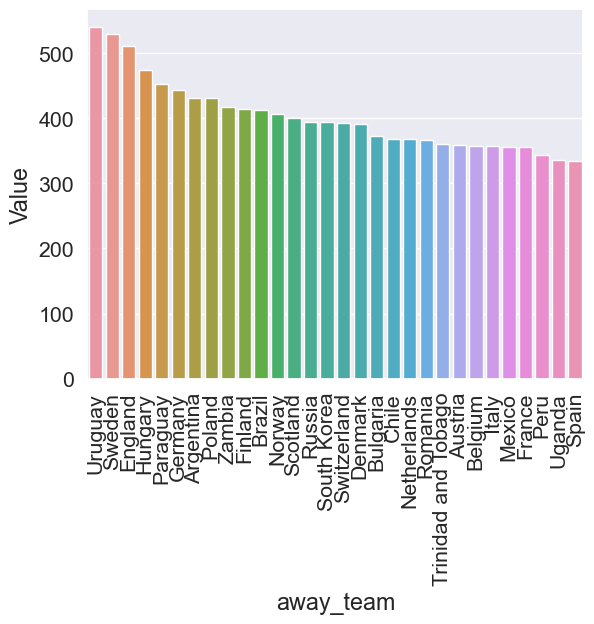

In [40]:
sns.barplot(x=home_total.away_team[:30], y=home_total.Value[:30])
#x좌표의 값을 90도 정도로 눕혀라
plt.xticks(rotation=90)

In [41]:
# 경기유형을 wordcloud 만들기 위해  텍스트로 처리
text= " ".join(cups for cups in df.tournament)

In [42]:
text

"Friendly Friendly Friendly Friendly Friendly Friendly Friendly Friendly Friendly Friendly Friendly Friendly Friendly Friendly Friendly Friendly Friendly Friendly Friendly Friendly Friendly Friendly Friendly Friendly Friendly Friendly Friendly Friendly Friendly British Championship British Championship British Championship British Championship British Championship British Championship British Championship British Championship British Championship British Championship British Championship British Championship Friendly British Championship British Championship British Championship British Championship British Championship British Championship Friendly British Championship British Championship British Championship British Championship British Championship British Championship British Championship British Championship British Championship British Championship British Championship British Championship Friendly British Championship British Championship British Championship British Championsh

In [43]:
wc = WordCloud(max_words= 30, background_color= 'white').generate(text)

In [44]:
wc

In [45]:
plt.figure(figsize= (10,5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

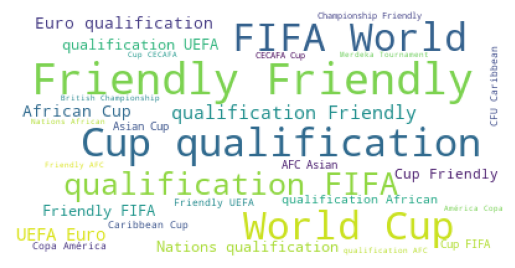

In [47]:
plt.imshow(wc)
plt.axis('off')

In [55]:
text1= " ".join(cups for cups in df.city)

In [56]:
wc1 = WordCloud(max_words= 30, background_color= 'lightyellow').generate(text1)

(-0.5, 399.5, 199.5, -0.5)

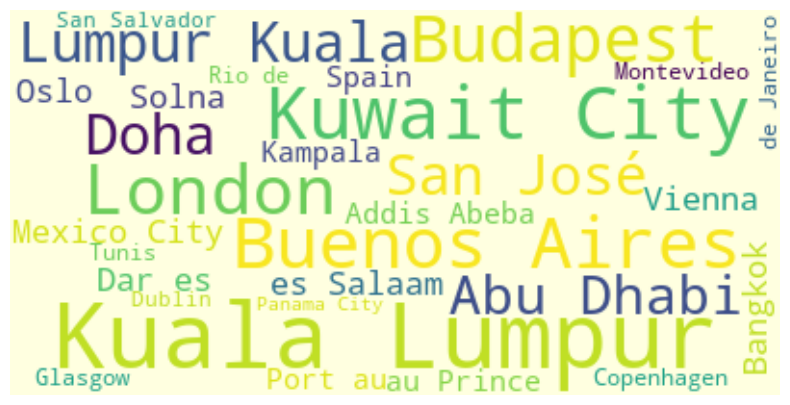

In [57]:
plt.figure(figsize= (10,5))
plt.imshow(wc1, interpolation= 'bilinear')
plt.axis('off')

In [58]:
df.tournament.value_counts()

tournament
Friendly                                17036
FIFA World Cup qualification             7236
UEFA Euro qualification                  2582
African Cup of Nations qualification     1672
FIFA World Cup                            900
                                        ...  
Dragon Cup                                  4
World Unity Cup                             4
Copa América qualification                  2
AFF Championship qualification              2
Atlantic Heritage Cup                       2
Name: count, Length: 112, dtype: int64

Text(0, 0.5, 'Total Held Count')

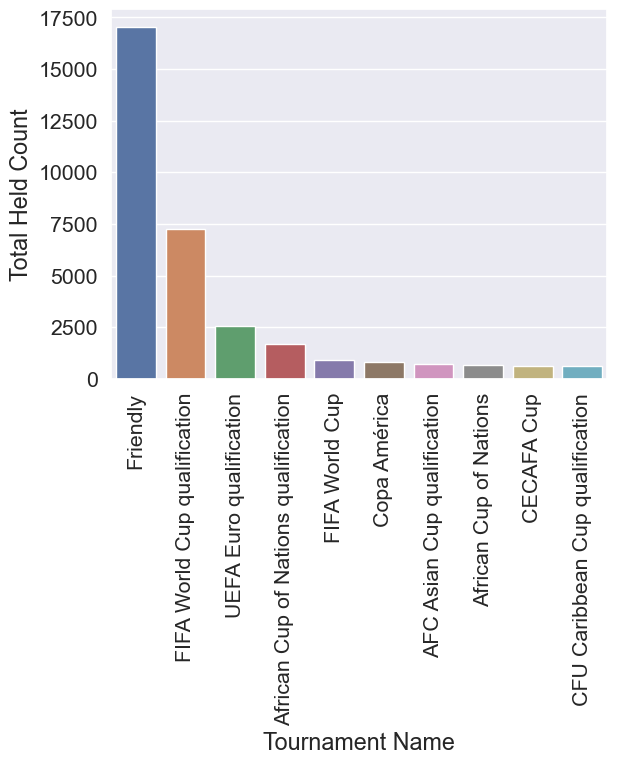

In [61]:
# 바 챠트 : barplot
sns.barplot(x= df['tournament'].value_counts().index[:10],
            y= df.tournament.value_counts().values[:10])
plt.xticks(rotation=90)
plt.xlabel('Tournament Name')
plt.ylabel('Total Held Count')

<Axes: xlabel='away_score', ylabel='home_score'>

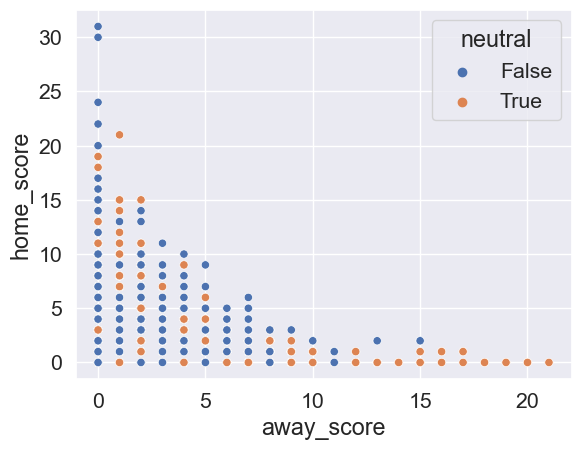

In [62]:
# 산점도
sns.scatterplot(x= 'away_score', y= 'home_score', hue= 'neutral', data= df)

In [63]:
# 홈팀경기 카운트
home_team_count = df['home_team'].value_counts()

In [66]:
home_team_count10= home_team_count.head(10)

In [67]:
home_team_count10

home_team
Brazil         568
Argentina      548
Mexico         513
Germany        506
England        498
Sweden         486
France         484
South Korea    465
Hungary        453
Italy          443
Name: count, dtype: int64

Text(0.5, 1.0, 'Major 10 Countries Data')

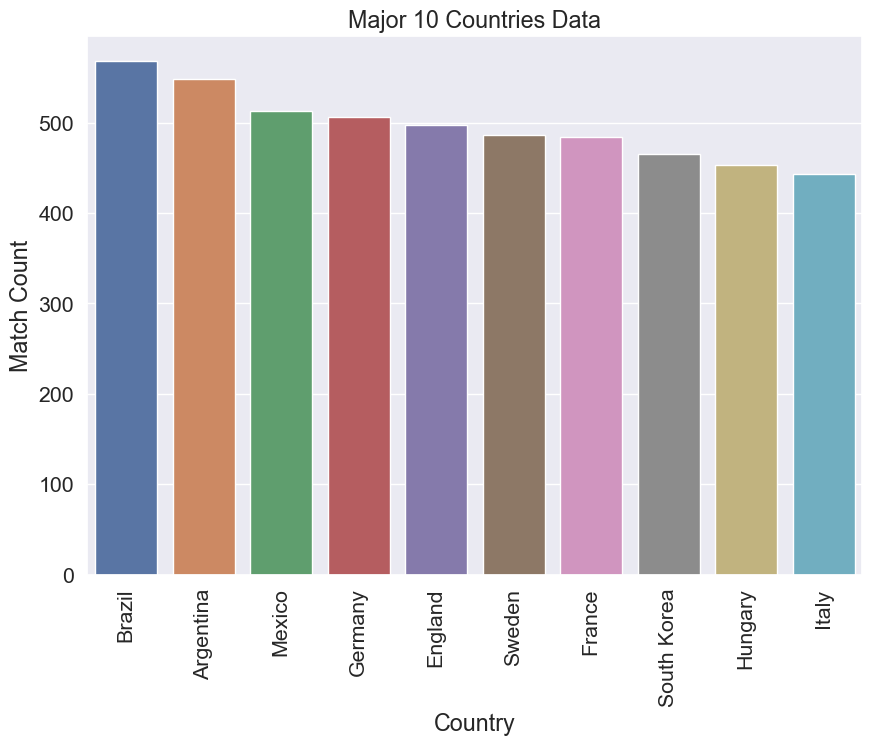

In [68]:
# 바 챠트 : barplot
plt.figure(figsize= (10,7))
sns.barplot(x= home_team_count10.index,
            y= home_team_count10.values)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Match Count')
plt.title('Major 10 Countries Data')

In [69]:
korea = df[df.home_team == 'South Korea']

In [70]:
korea

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,score_sum,score_diff,formal_score
3082,1950-04-16,South Korea,Chinese Taipei,3,1,Friendly,Wan Chai,Hong Kong,True,4,2,3-1
3457,1953-04-08,South Korea,Chinese Taipei,2,4,Friendly,So Kon Po,Hong Kong,True,6,-2,4-2
3656,1954-06-20,South Korea,Turkey,0,7,FIFA World Cup,Geneva,Switzerland,True,7,-7,7-0
3935,1956-04-21,South Korea,Philippines,3,0,AFC Asian Cup qualification,Seoul,South Korea,False,3,3,3-0
3998,1956-08-26,South Korea,Chinese Taipei,2,0,AFC Asian Cup qualification,Seoul,South Korea,False,2,2,2-0
...,...,...,...,...,...,...,...,...,...,...,...,...
40577,2019-03-26,South Korea,Colombia,2,1,Friendly,Seoul,South Korea,False,3,1,2-1
40685,2019-06-07,South Korea,Australia,1,0,Friendly,Busan,South Korea,False,1,1,1-0
40753,2019-06-11,South Korea,Iran,1,1,Friendly,Seoul,South Korea,False,2,0,1-1
40989,2019-09-05,South Korea,Georgia,2,2,Friendly,Istanbul,Turkey,True,4,0,2-2


In [71]:
korea['away_team'].unique()

array(['Chinese Taipei', 'Turkey', 'Philippines', 'Vietnam Republic',
       'United States', 'Singapore', 'Indonesia', 'Hong Kong', 'Israel',
       'Japan', 'Yugoslavia', 'Thailand', 'Malaysia', 'Western Australia',
       'Australia', 'Laos', 'Cambodia', 'Burma', 'Iran', 'Iraq', 'Kuwait',
       'Lebanon', 'India', 'New Zealand', 'Libya', 'Syria', 'Bahrain',
       'Macau', 'China PR', 'Sudan', 'Sri Lanka', 'Bangladesh',
       'Luxembourg', 'United Arab Emirates', 'North Korea', 'Uruguay',
       'Nigeria', 'Ghana', 'Nepal', 'Guatemala', 'Cameroon', 'Yemen',
       'Pakistan', 'Qatar', 'Paraguay', 'Bulgaria', 'Italy', 'Egypt',
       'Zambia', 'Yemen DPR', 'Saudi Arabia', 'Czechoslovakia', 'Norway',
       'Spain', 'Malta', 'Romania', 'Czech Republic', 'Bolivia',
       'Ukraine', 'Colombia', 'Serbia', 'Costa Rica', 'Brazil', 'Morocco',
       'Sweden', 'Guam', 'Tajikistan', 'Kazakhstan', 'Uzbekistan',
       'Jamaica', 'Mexico', 'Belgium', 'Croatia', 'Mongolia',
       'North Mace

In [72]:
all_away_team = korea['away_team'].unique()

In [73]:
all_away_team

array(['Chinese Taipei', 'Turkey', 'Philippines', 'Vietnam Republic',
       'United States', 'Singapore', 'Indonesia', 'Hong Kong', 'Israel',
       'Japan', 'Yugoslavia', 'Thailand', 'Malaysia', 'Western Australia',
       'Australia', 'Laos', 'Cambodia', 'Burma', 'Iran', 'Iraq', 'Kuwait',
       'Lebanon', 'India', 'New Zealand', 'Libya', 'Syria', 'Bahrain',
       'Macau', 'China PR', 'Sudan', 'Sri Lanka', 'Bangladesh',
       'Luxembourg', 'United Arab Emirates', 'North Korea', 'Uruguay',
       'Nigeria', 'Ghana', 'Nepal', 'Guatemala', 'Cameroon', 'Yemen',
       'Pakistan', 'Qatar', 'Paraguay', 'Bulgaria', 'Italy', 'Egypt',
       'Zambia', 'Yemen DPR', 'Saudi Arabia', 'Czechoslovakia', 'Norway',
       'Spain', 'Malta', 'Romania', 'Czech Republic', 'Bolivia',
       'Ukraine', 'Colombia', 'Serbia', 'Costa Rica', 'Brazil', 'Morocco',
       'Sweden', 'Guam', 'Tajikistan', 'Kazakhstan', 'Uzbekistan',
       'Jamaica', 'Mexico', 'Belgium', 'Croatia', 'Mongolia',
       'North Mace

In [74]:
Away_team = []
Korea_team = []
for team in all_away_team:
    Away_team.append(np.sum(korea[korea['away_team'] == team].away_score))
    Korea_team.append(np.sum(korea[korea['away_team'] == team].home_score))

In [76]:
Away_team

[8,
 12,
 0,
 11,
 1,
 7,
 4,
 5,
 1,
 15,
 3,
 18,
 21,
 3,
 13,
 0,
 2,
 2,
 17,
 4,
 3,
 0,
 1,
 1,
 0,
 1,
 4,
 1,
 10,
 0,
 0,
 0,
 3,
 3,
 3,
 9,
 4,
 4,
 0,
 0,
 3,
 0,
 0,
 5,
 4,
 2,
 4,
 7,
 4,
 1,
 6,
 0,
 6,
 3,
 1,
 4,
 4,
 0,
 0,
 3,
 5,
 5,
 8,
 5,
 4,
 0,
 1,
 0,
 7,
 1,
 7,
 3,
 4,
 0,
 1,
 8,
 4,
 0,
 1,
 1,
 2,
 0,
 2,
 1,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 3,
 1,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 4,
 1,
 0,
 2,
 2]

In [77]:
Korea_team

[25,
 4,
 11,
 22,
 4,
 58,
 37,
 24,
 7,
 33,
 1,
 65,
 58,
 0,
 16,
 23,
 11,
 12,
 15,
 12,
 10,
 15,
 19,
 6,
 4,
 4,
 28,
 4,
 18,
 8,
 18,
 15,
 5,
 16,
 14,
 4,
 7,
 7,
 35,
 2,
 9,
 6,
 6,
 5,
 5,
 1,
 4,
 7,
 8,
 1,
 6,
 0,
 5,
 1,
 1,
 3,
 4,
 1,
 3,
 9,
 6,
 8,
 4,
 3,
 2,
 9,
 4,
 3,
 23,
 5,
 5,
 1,
 7,
 6,
 2,
 2,
 3,
 0,
 4,
 1,
 4,
 1,
 5,
 0,
 7,
 7,
 1,
 3,
 2,
 1,
 1,
 3,
 2,
 0,
 0,
 4,
 2,
 2,
 6,
 0,
 4,
 3,
 2,
 0,
 2,
 3,
 2,
 2,
 2]

In [78]:
frames = [all_away_team, Korea_team, Away_team]

In [81]:
type(frames)

list

In [82]:
all_country = pd.DataFrame(frames)

In [83]:
all_country

,0,1,2,3,4,5,6,7,8,9,...,99,100,101,102,103,104,105,106,107,108
0,Chinese Taipei,Turkey,Philippines,Vietnam Republic,United States,Singapore,Indonesia,Hong Kong,Israel,Japan,...,Peru,Haiti,Mali,Switzerland,Tunisia,Algeria,Venezuela,Canada,Panama,Georgia
1,25,4,11,22,4,58,37,24,7,33,...,0,4,3,2,0,2,3,2,2,2
2,8,12,0,11,1,7,4,5,1,15,...,0,1,1,1,1,4,1,0,2,2


Text(0.5, 1.0, 'Korea Match')

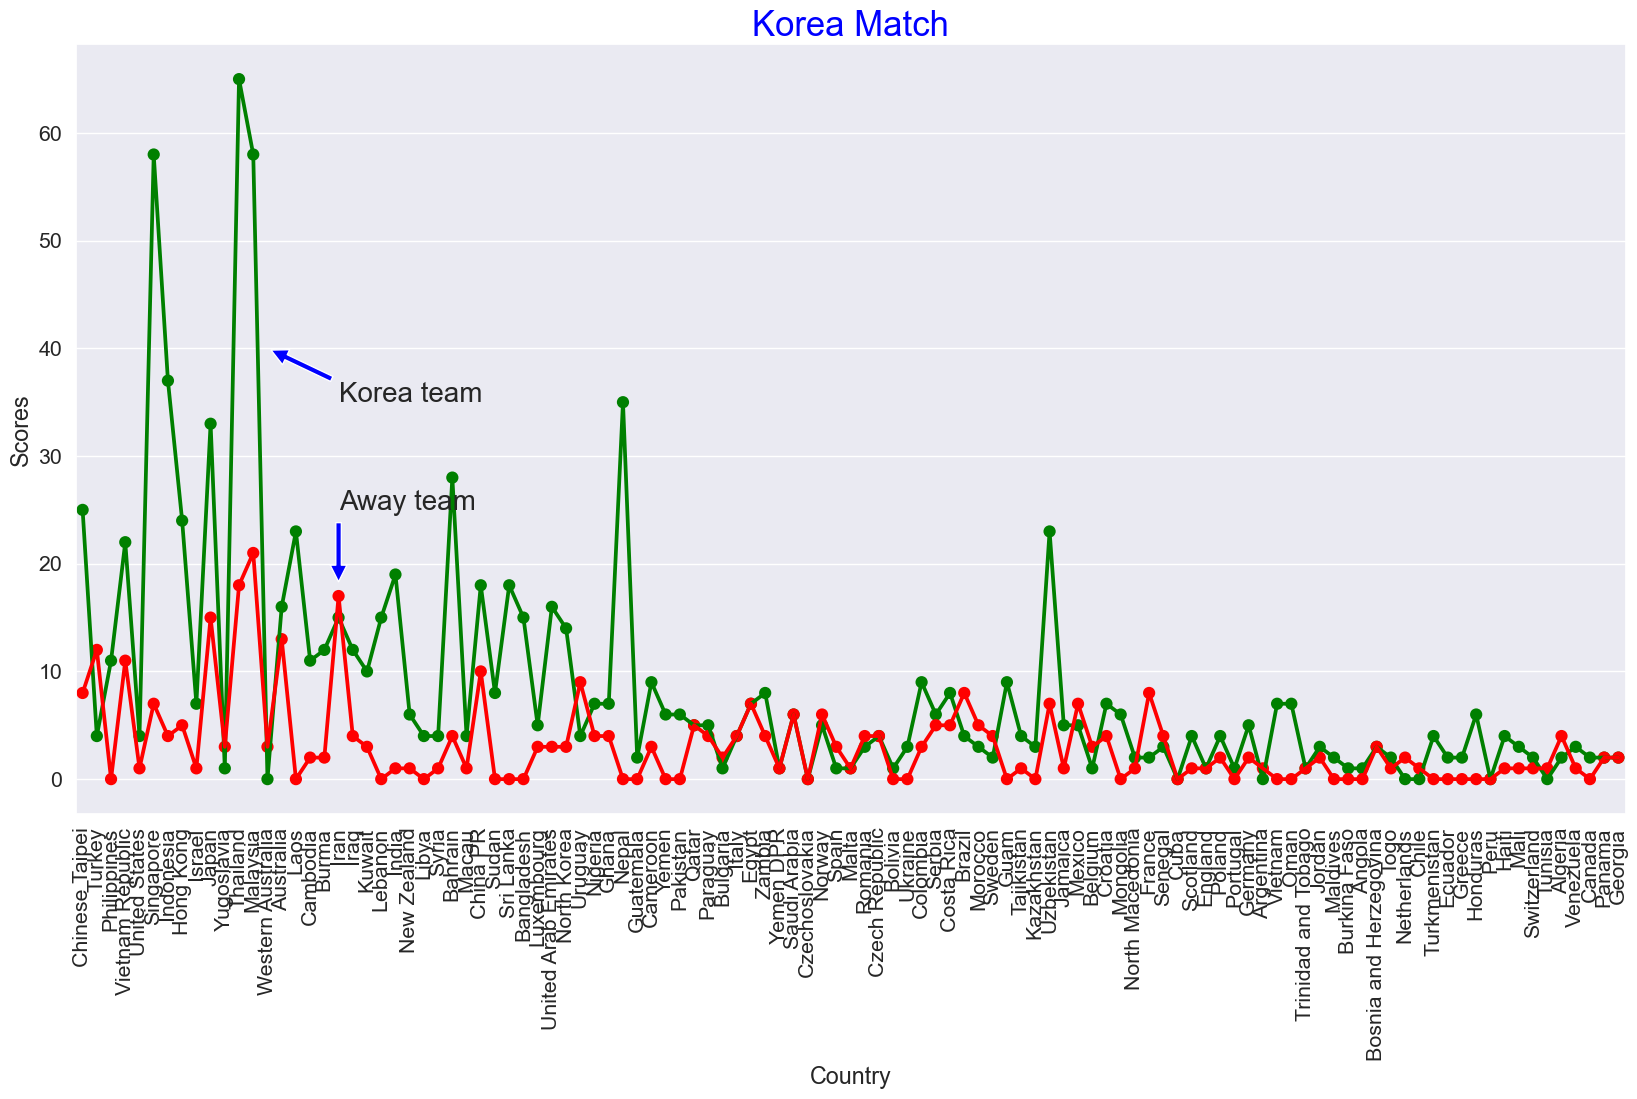

In [93]:
# 두 개의 차트 : subplots, pointplot: 점선
fig, ax = plt.subplots(figsize= (20,10))
sns.pointplot(x= all_away_team, y= Korea_team, color= 'green')
sns.pointplot(x= all_away_team, y= Away_team, color= 'red')
# 점선을 가리키는 라벨
ax.annotate('Korea team', xy= (13,40), xytext= (18,35), fontsize= 20,
           arrowprops= dict(facecolor= 'blue', shrink= 0.05))
ax.annotate('Away team', xy= (18,18), xytext= (18,25), fontsize= 20,
           arrowprops= dict(facecolor= 'blue', shrink= 0.05))
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Scores')
plt.title('Korea Match', fontsize= 25, color= 'blue')

Text(0.5, 1.0, 'Korea Match')

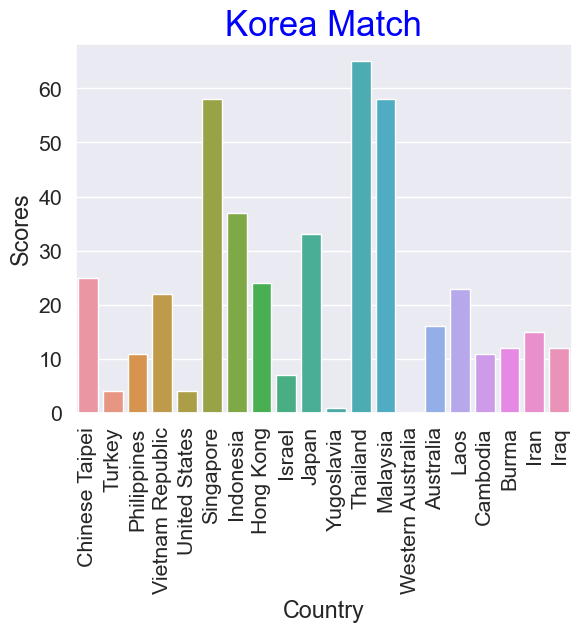

In [94]:
sns.barplot(x= all_away_team[:20], y= Korea_team[:20])
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Scores')
plt.title('Korea Match', fontsize= 25, color= 'blue')

In [98]:
# 2009년부터 2018년까지 홈팀 대한민국 축구대표팀 vs 원정팀 평균득점
def avg_goal_per_year(year):
    match = (df.home_team == 'South Korea') & df.date.astype(str).str.contains(year)
    return df[match].score_sum.mean()

In [99]:
match_years = [str(2009+i) for i in range(0,10)]

In [100]:
match_years

['2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018']

In [101]:
avg_goal_for_year = [avg_goal_per_year(year) for year in match_years]

In [102]:
avg_goal_for_year

[1.75,
 2.1666666666666665,
 3.875,
 3.4,
 2.0833333333333335,
 2.7142857142857144,
 2.5454545454545454,
 3.2,
 2.3333333333333335,
 2.1666666666666665]

In [103]:
years = pd.DataFrame(match_years, columns=['year'])

In [104]:
years

,year
0,2009
1,2010
2,2011
3,2012
4,2013
5,2014
6,2015
7,2016
8,2017
9,2018


In [105]:
goals = pd.DataFrame(avg_goal_for_year, columns=['average_score'])

In [106]:
goals

,average_score
0,1.750000
1,2.166667
2,3.875000
3,3.400000
4,2.083333
5,2.714286
6,2.545455
7,3.200000
8,2.333333
9,2.166667


In [107]:
avg_goal = pd.concat([years, goals], axis=1)

In [108]:
avg_goal

,year,average_score
0,2009,1.750000
1,2010,2.166667
2,2011,3.875000
3,2012,3.400000
4,2013,2.083333
5,2014,2.714286
6,2015,2.545455
7,2016,3.200000
8,2017,2.333333
9,2018,2.166667


Text(0.5, 1.0, 'average score 2009~2018')

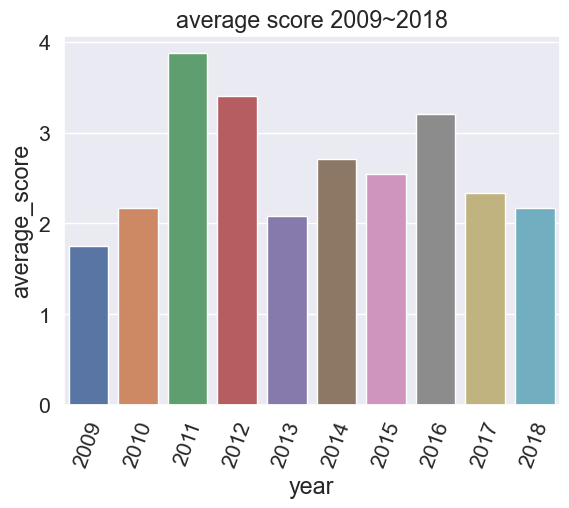

In [109]:
sns.barplot(x= avg_goal['year'], y= avg_goal['average_score'])
plt.xticks(rotation=70)
plt.title('average score 2009~2018')

In [110]:
k_match = (df.home_team) == 'South Korea'

In [111]:
k_match 

0        False
1        False
2        False
3        False
4        False
         ...  
41535    False
41536    False
41537    False
41538    False
41539    False
Name: home_team, Length: 41540, dtype: bool

In [113]:
# astype : 데이터 타입 변경
def k_year(year):
    return df.date.astype(str).str.contains(str(year))

In [114]:
k_yearly = k_match & (k_year(2013) | k_year(2014) | k_year(2015) | k_year(2016) |
                      k_year(2017) | k_year(2018))

In [116]:
df[k_yearly].head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,score_sum,score_diff,formal_score
35058,2013-03-26,South Korea,Qatar,2,1,FIFA World Cup qualification,Seoul,South Korea,False,3,1,2-1
35200,2013-06-11,South Korea,Uzbekistan,1,0,FIFA World Cup qualification,Seoul,South Korea,False,1,1,1-0
35240,2013-06-18,South Korea,Iran,0,1,FIFA World Cup qualification,Ulsan,South Korea,False,1,-1,1-0
35304,2013-07-20,South Korea,Australia,0,0,EAFF Championship,Seoul,South Korea,False,0,0,0-0
35313,2013-07-24,South Korea,China PR,0,0,EAFF Championship,Hwaseong,South Korea,False,0,0,0-0


In [117]:
k_yearly

0        False
1        False
2        False
3        False
4        False
         ...  
41535    False
41536    False
41537    False
41538    False
41539    False
Length: 41540, dtype: bool

In [118]:
df[k_yearly].formal_score.value_counts()

formal_score
2-0    10
1-0     9
2-1     8
0-0     8
3-1     5
1-1     2
3-0     2
4-0     2
3-2     2
2-2     2
4-1     1
4-2     1
8-0     1
Name: count, dtype: int64

In [119]:
score_dist = df[k_yearly].formal_score.value_counts(normalize= True)

In [120]:
score_dist

formal_score
2-0    0.188679
1-0    0.169811
2-1    0.150943
0-0    0.150943
3-1    0.094340
1-1    0.037736
3-0    0.037736
4-0    0.037736
3-2    0.037736
2-2    0.037736
4-1    0.018868
4-2    0.018868
8-0    0.018868
Name: proportion, dtype: float64

In [121]:
x = score_dist.index

In [122]:
x

Index(['2-0', '1-0', '2-1', '0-0', '3-1', '1-1', '3-0', '4-0', '3-2', '2-2',
       '4-1', '4-2', '8-0'],
      dtype='object', name='formal_score')

In [123]:
y =  score_dist.values

In [124]:
y

array([0.18867925, 0.16981132, 0.1509434 , 0.1509434 , 0.09433962,
       0.03773585, 0.03773585, 0.03773585, 0.03773585, 0.03773585,
       0.01886792, 0.01886792, 0.01886792])

Text(0.5, 1.0, '2013~2018 Score of Korea team')

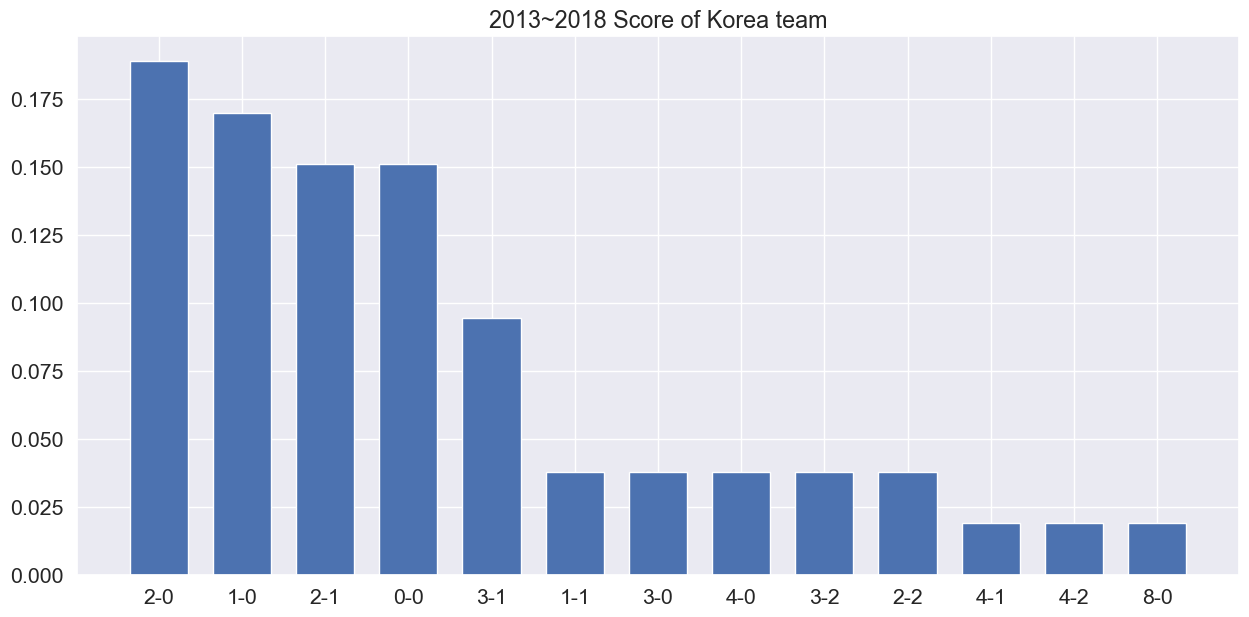

In [127]:
fig, ax = plt.subplots(figsize=(15,7))
ax.bar(x, y, width= 0.7)
plt.title('2013~2018 Score of Korea team')